MOEIR GLOBAL RECALL

el GR se toma del directorio "globalPRF1"

Hay un archivo por tópico.
Cada archivo tiene:

Estadísticas globales en filas:

Precisión (esta es GLOBAL - en MOGP no la calculamos)
Recall GLOBAL (como el que uso yo)
F1

Las corridas están en columnas. La 0 es sobre la población inicial y los resultados de las 5 corridas.

P_0      P_1     P_2      P_3      P_4      P_5

GR_0     GR_1    GR_2     GR_3     GR_4     GR_5

F1_0     F1_1    F1_2     F1_3     F1_4     F1_5



In [41]:
import os
import pandas as pd
import math


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

files = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(files)

['transposeRep_global_metrics465.csv', 'transposeRep_global_metrics556.csv', 'transposeRep_global_metrics1.csv', 'transposeRep_global_metrics187.csv', 'transposeRep_global_metrics58.csv', 'transposeRep_global_metrics289.csv', 'transposeRep_global_metrics215.csv', 'transposeRep_global_metrics537.csv', 'readme.txt', 'transposeRep_global_metrics350.csv', 'transposeRep_global_metrics134.csv', 'transposeRep_global_metrics538.csv', 'transposeRep_global_metrics428.csv', 'transposeRep_global_metrics561.csv', 'transposeRep_global_metrics529.csv', 'transposeRep_global_metrics37.csv', 'transposeRep_global_metrics363.csv', 'transposeRep_global_metrics418.csv', 'transposeRep_global_metrics586.csv', 'transposeRep_global_metrics221.csv', 'transposeRep_global_metrics259.csv', 'transposeRep_global_metrics528.csv', 'transposeRep_global_metrics25.csv', 'transposeRep_global_metrics476.csv', 'transposeRep_global_metrics99.csv', 'transposeRep_global_metrics403.csv']


In [50]:
#df_ave_data = pd.DataFrame(columns=['topic', '0', '1','2','3', '4', '5'])
df_ave_data = pd.DataFrame()
   
# inserto nro de topico


for f in sorted(files):
    row = []
    if "transposeRep_global_" in f:
                    
        t = f.split('.')[0] # quito el .csv
        t = t.split('_')[2] # me quedo con "metric#topico"
        t = t[7:] # solo nro de topico
        print(t)
        path_pr = "".join([dir_path, f])
        print(path_pr)
        
        # read text file into pandas DataFrame
        df_metric = pd.read_csv(path_pr, header=None, sep=',')
        print(df_metric)
        # drop column 0 from DF that correspods to Initial random pop from moeir
        df_metric = df_metric.drop([0],axis=1)
        print(df_metric)
        # tomar fila 1 de cada DF que es el RECALL GLOBAL
        entry = df_metric.iloc[1] 
        print(entry)
        entry['topic'] = t
        
        df_ave_data = df_ave_data.append(entry)
                  

df_ave_data.reset_index(drop=True)
## df con promedio de la ultima poblacion de p@10 de cada corrida para cada topico
##    topic     1      2       3           4      5        
##    134	0.7050	0.719	0.760000	0.816	0.808
##     1	    0.8055	0.817	0.799333	0.690	0.830
#df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)
#
#
## set the 'topic' column as index
#df_ave_data.set_index('topic', inplace=True)
#df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)
#
#df_ave_data = df_ave_data.transpose()
##df_ave_data.to_csv(save_path + 'moeir_globalRecall_evaluation_by_run_last_gen.csv')
#
#df_ave_data

1
/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/transposeRep_global_metrics1.csv
          0         1         2         3         4         5
0  0.020556  0.335714  0.136531  0.375527  0.221875  0.369159
1  0.585859  0.474747  0.373737  0.449495  0.358586  0.398990
2  0.039719  0.393305  0.200000  0.409195  0.274131  0.383495
          1         2         3         4         5
0  0.335714  0.136531  0.375527  0.221875  0.369159
1  0.474747  0.373737  0.449495  0.358586  0.398990
2  0.393305  0.200000  0.409195  0.274131  0.383495
1    0.474747
2    0.373737
3    0.449495
4    0.358586
5    0.398990
Name: 1, dtype: float64
134
/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/globalPRF1/transposeRep_global_metrics134.csv
          0         1         2         3         4         5
0  0.057452  0.193154  0.149803  0.210980  0.094818  0.183079
1  0.661017  0.669492  0.644068  0.759887  0.759887  0.745763
2  0.105715  0.299810  0.243070  0.330264  0.1

,1,2,3,4,5,topic
0,0.474747,0.373737,0.449495,0.358586,0.398990,1
1,0.669492,0.644068,0.759887,0.759887,0.745763,134
2,0.642570,0.224900,0.333333,0.630522,0.477912,187
3,0.160714,0.160714,0.214286,0.267857,0.375000,215
4,0.557625,0.355064,0.689173,0.452852,0.371362,221
5,0.743902,0.634146,0.280488,0.317073,0.353659,25
6,0.375000,0.233333,0.350000,0.300000,0.458333,259
7,0.564516,0.387097,0.314516,0.314516,0.290323,289
8,0.448276,0.500000,0.586207,0.396552,0.482759,350
9,0.562189,0.358209,0.388060,0.278607,0.522388,363


LLEGUE HASTA ACA! ------ seguir!

In [43]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,0,1,2,3,4,5,topic
mean,0.501027,0.472357,0.394117,0.418935,0.380663,0.401302,4.536749e+66
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01
std,0.172936,0.167609,0.155875,0.168510,0.194367,0.155012,NaN


In [44]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
0,5.010275e-01,25.0,0.172936
1,4.723567e-01,25.0,0.167609
2,3.941168e-01,25.0,0.155875
3,4.189346e-01,25.0,0.168510
4,3.806634e-01,25.0,0.194367
5,4.013019e-01,25.0,0.155012
topic,4.536749e+66,25.0,NaN


se promedian solo los promedios de los tópicos y se calcula el STD sobre esos promedios

In [45]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_prec': [stats_all_topics['mean'].mean()],                    
                    'count_prec': [stats_all_topics['mean'].count()],
                    'std_prec': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_prec'] = ci95_lo
t['ci95_hi_prec'] = ci95_hi


t.to_csv(save_path + 'co3_precision10_evaluation_stats_last_gen.csv')
t

,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,6.481070e+65,7,1.714730e+66,-6.221827e+65,1.918397e+66


NameError: name 'comb' is not defined

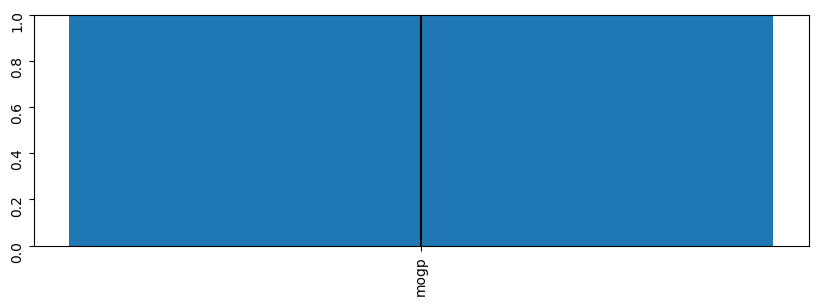

In [46]:
######### PRECISION @ 10
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_prec'], yerr=t['std_prec'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Precision@10  - '+ comb)